In [1]:
from urllib import request as req

img_file_name = "images.zip"
img_link = f"https://github.com/RasmusHelsgaun/Python-Unicorn-10/raw/master/{img_file_name}"

req.urlretrieve(img_link, img_file_name);

In [2]:
import zipfile

zipfile.ZipFile(img_file_name, "r").extractall(".")

In [3]:
import cv2

img_original = "original.jpg"
img_duplicate = "dublicate.jpg"

original = cv2.imread(img_original)
duplicate = cv2.imread(img_duplicate)

In [4]:
# Converting to greyscale
original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
duplicate = cv2.cvtColor(duplicate, cv2.COLOR_BGR2GRAY)

In [5]:
from matplotlib import pyplot as plt

plt.imshow(original, cmap='gray')

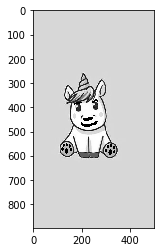

In [6]:
plt.imshow(duplicate, cmap='gray')

In [7]:
merge = original == duplicate

In [8]:
merge

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [9]:
count = 0
total = 0

for row in merge:
    for pixel in row:
        total += 1
        if(not pixel):
            count += 1
print("The difference is:", '{0:.3g}'.format(count / total * 100), "%")

The difference is: 2.25 %


In [10]:
# Calculating similarities
from skimage.measure import compare_ssim

(score, diff) = compare_ssim(original, duplicate, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 0.9817298149481689


In [11]:
merge_img = [[ 0 if pixel else 1 for pixel in row] for row in merge]

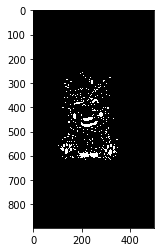

In [12]:
plt.imshow(merge_img, cmap='gray')

In [13]:
import numpy as np
def create_mask(image):

    # Color boundries
    lower = 1
    upper = 1
 
    mask = cv2.inRange(np.asarray(image), lower, upper)
    mask = cv2.erode(mask, None, iterations=1)
    
    return mask

In [14]:
new_merge_img = create_mask(merge_img)

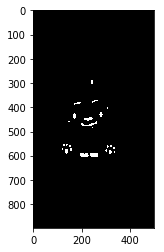

In [15]:
plt.imshow(new_merge_img, cmap='gray')

In [40]:
def mark_object(image, mask):
    contours = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    # find the largest contour in the mask, then use
    # it to compute the minimum enclosing circle and
    # centroid
    #c = max(contours, key=cv2.contourArea)
    for c in contours:
        ((x, y), radius) = cv2.minEnclosingCircle(c)

        # draw the circle and centroid on the frame,
        # then update the list of tracked points
        cv2.circle(image, (int(x), int(y)), int(radius), (255, 0, 0), 3)
    return image

In [41]:
duplicate = cv2.imread(img_duplicate)
marked_img = mark_object(duplicate, new_merge_img)

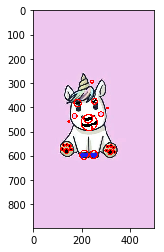

In [42]:
plt.imshow(marked_img)